In [37]:
# Imports
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [38]:
DATA_PATH = "data/"

In [39]:
areas = {
	"Northen America": set(["United States of America", "Canada"]),
	"Europe": set(["United Kingdom", "France", "Italy", "Germany", "Spain", "West Germany", "Belgium", "German Democratic Republic", "Ireland", "Switzerland", "Austria", "England", "Luxembourg", "Portugal"]),
	"Asia": set(["Japan", "Hong Kong", "China", "South Korea", "Taiwan"]),
	"India": set(["India", "Pakistan"])
}
country_to_area = {country: area for area, countries in areas.items() for country in countries}

movies_df = pd.read_csv(DATA_PATH + 'movie.metadata.tsv', delimiter='\t', header=None, names=['wiki_id', 'id', 'name', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'])
movies_df["countries"] = movies_df["countries"].apply(lambda x: list(json.loads(x).values()))
display(movies_df.head())

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",[Norway],"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],"{""/m/07s9rl0"": ""Drama""}"


In [40]:
# Only keep the countries that are in the areas
movies_df["countries"] = movies_df["countries"].apply(lambda x: [country for country in x if country in country_to_area])

# Only keep the movies that have at least one country
movies_df = movies_df[movies_df["countries"].apply(lambda x: len(x) > 0)]

# Only keep the movies that have countries that are not in the same area
movies_df["areas"] = movies_df["countries"].apply(lambda x: set([country_to_area[country] for country in x]))
movies_df = movies_df[movies_df["areas"].apply(lambda x: len(x) > 1)]

display(movies_df.head())

,wiki_id,id,name,release_date,revenue,runtime,languages,countries,genres,areas
33,27611999,/m/04j284s,Special Effects,1984,NaN,93.0,{},"[United States of America, United Kingdom]","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{Northen America, Europe}"
98,5894429,/m/0fc8w8,Closing the Ring,2007-09-14,NaN,117.0,"{""/m/02h40lc"": ""English Language""}","[United States of America, Canada, United King...","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...","{Northen America, Europe}"
101,27556929,/m/04j0jtp,Deadly Voyage,1996,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","[United States of America, United Kingdom]","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...","{Northen America, Europe}"
175,196176,/m/01bwgr,Straw Dogs,1971-11-03,11148828.0,118.0,"{""/m/02h40lc"": ""English Language""}","[United States of America, United Kingdom]","{""/m/01jfsb"": ""Thriller"", ""/m/07s9rl0"": ""Drama""}","{Northen America, Europe}"
190,26137128,/m/0b6dn1z,The Bone Snatcher,2003-12-23,NaN,91.0,"{""/m/02h40lc"": ""English Language""}","[Canada, England]","{""/m/03npn"": ""Horror""}","{Northen America, Europe}"


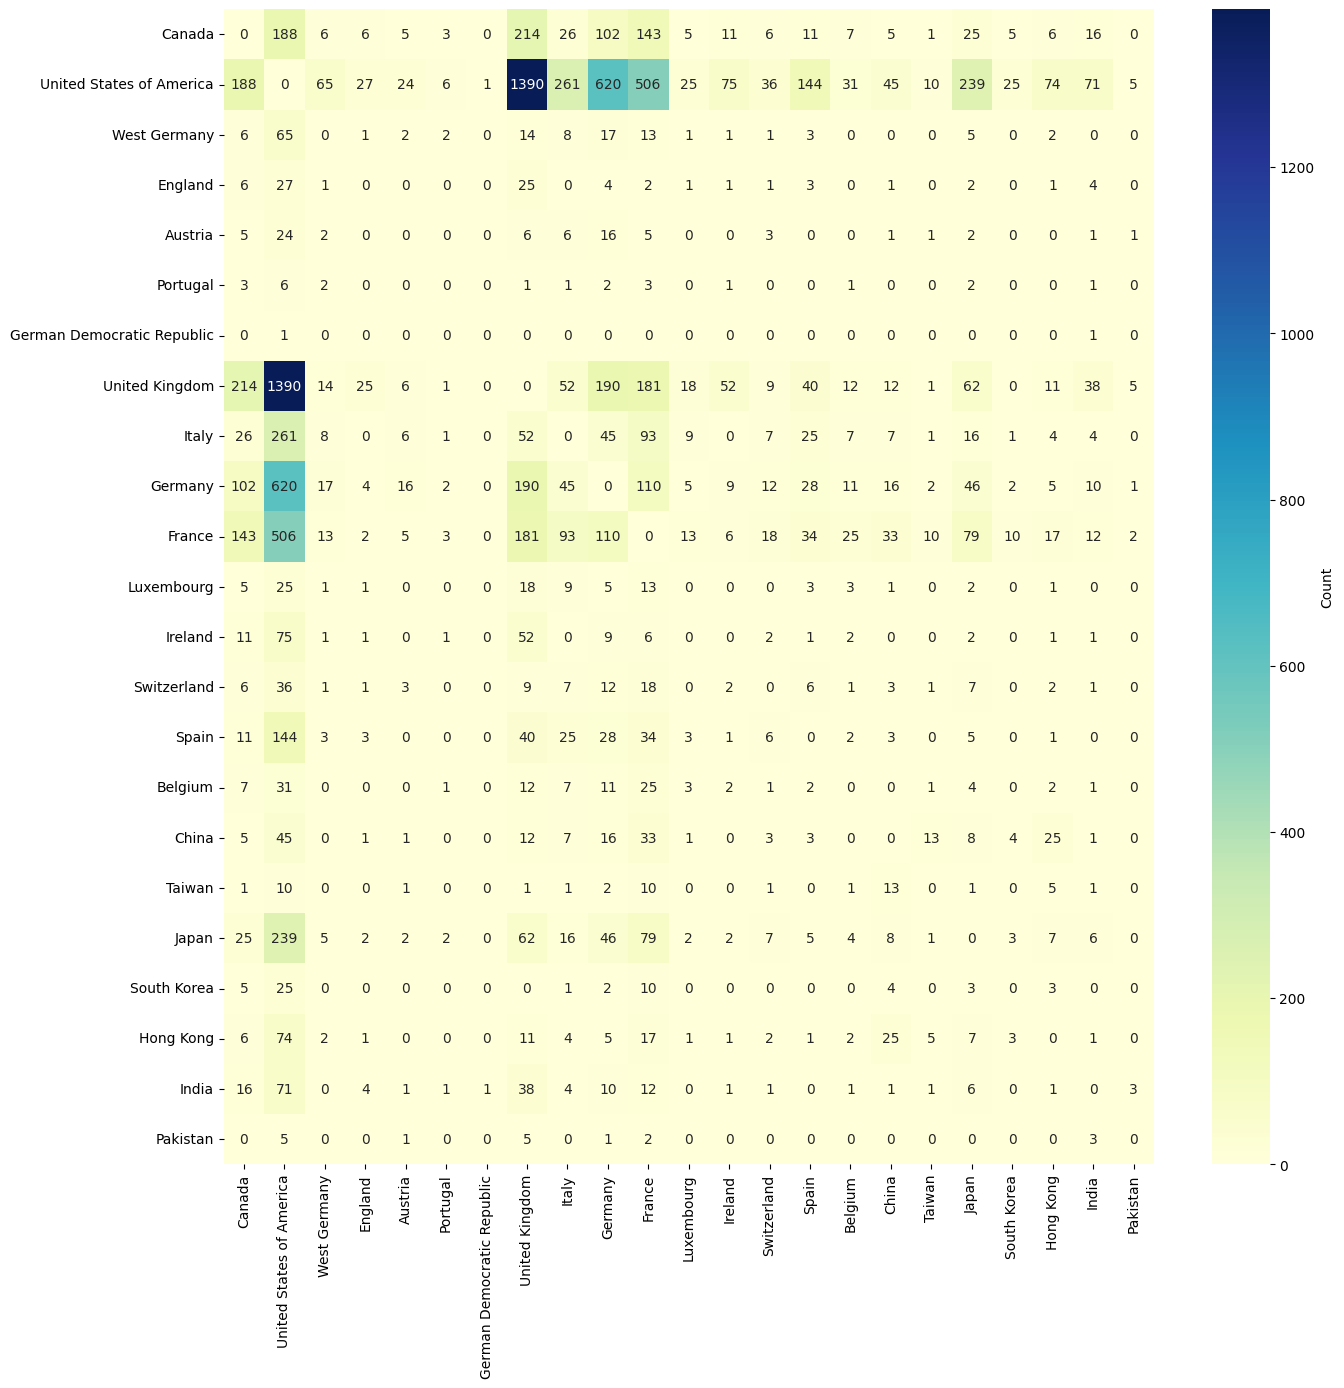

In [43]:
# Display a heatmap of the combinations of countries
countries_df = pd.DataFrame(columns=country_to_area.keys(), index=country_to_area.keys())
countries_df = countries_df.fillna(0)
for index, row in movies_df.iterrows():
	countries_list = list(row["countries"])
	pairs = combinations(countries_list, 2)
	for pair in pairs:
		countries_df[pair[0]][pair[1]] += 1
		countries_df[pair[1]][pair[0]] += 1

plt.figure(figsize=(15, 15))
sns.heatmap(countries_df, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Count'})
plt.show()

,Northen America,Europe,Asia,India
Northen America,0,2736,376,88
Europe,2736,0,238,67
Asia,376,238,0,9
India,88,67,9,0


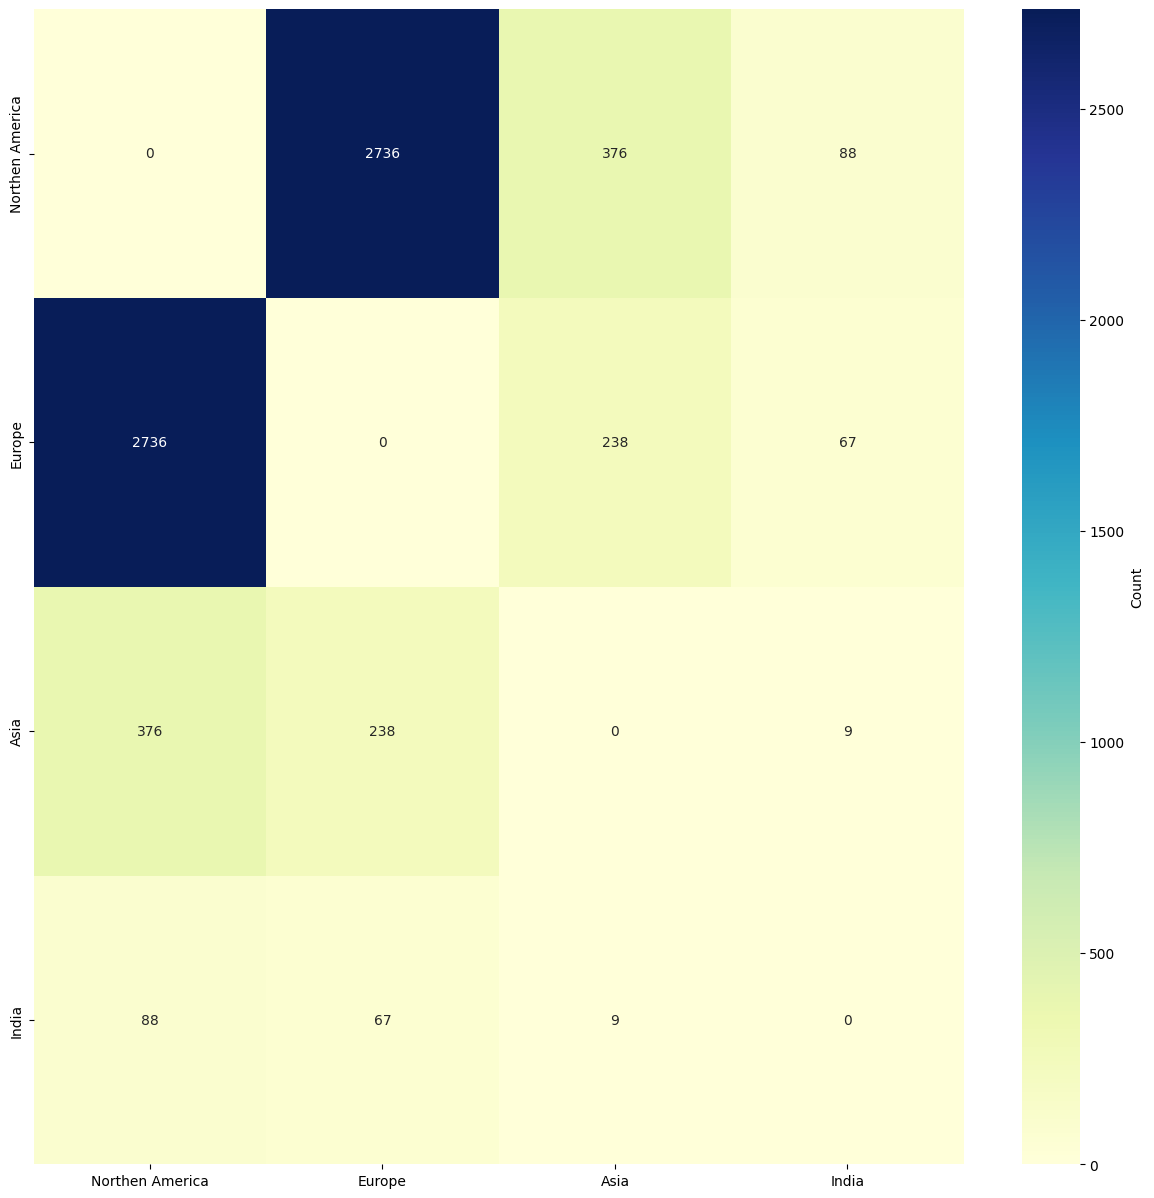

In [42]:
# Display a heatmap of the combination of areas
areas_df = pd.DataFrame(columns=areas.keys(), index=areas.keys())
areas_df = areas_df.fillna(0)
for index, row in movies_df.iterrows():
	areas_list = list(row["areas"])
	pairs = list(combinations(areas_list, 2))
	for pair in pairs:
		areas_df[pair[0]][pair[1]] += 1
		areas_df[pair[1]][pair[0]] += 1

plt.figure(figsize=(15, 15))
sns.heatmap(areas_df, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Count'})
plt.show()